<a href="https://colab.research.google.com/github/Coderdivine/FeaturesExtraction-FrequencyDomain-./blob/main/FeaturesExtraction(FrequencyDomain).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Required Modules**

In [3]:
import librosa as librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline
import librosa.display
from IPython.display import Audio
import pandas as pd
import os
from sklearn.model_selection import train_test_split
#import splitfolders
import skimage.io


**Load sample audio file and display the raw waveform (Time domain)**

<ipython-input-7-5254402a9248>:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y, sr= sr, x_axis='s')


The sampled Audio rendered as a numpy array (time series) and has  (2096484,)  number of samples
25 randomly picked consequitive samples of the audio are:  [4.9299873e-05 7.2948402e-05 3.2070107e-05 8.1686863e-05 5.4507000e-05
 4.0108389e-05 7.2190975e-05 4.5459776e-05 7.1256494e-05 4.6371621e-05
 6.0345963e-05 5.8548321e-05 1.8507180e-05 7.0317765e-05 2.3741370e-05
 3.4583496e-05 5.8939113e-05 5.3319509e-05 4.7380730e-05 3.0137104e-05
 3.6460544e-05 2.8117214e-05 6.0899467e-05 6.6507237e-05 1.8962284e-05]


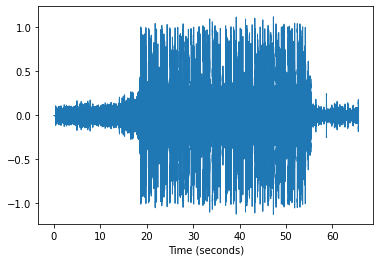

In [7]:
y, sr = librosa.load('/smoke.mp3', sr=32000)
librosa.display.waveshow(y, sr= sr, x_axis='s')
print("The sampled Audio rendered as a numpy array (time series) and has ", y.shape, " number of samples")
print("25 randomly picked consequitive samples of the audio are: ", y[3000:3025])

**Listen to Audio**

In [9]:
Audio('/smoke.mp3')

***Fetch*** **Spectrogram**.

In [10]:
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
n_fft=1024

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=320

# Specify the window type for FFT/STFT
window_type ='hann'

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type)) ** 2

print("The shape of spectrogram_librosa is: ", spectrogram_librosa.shape)
print("The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])")
print("The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft",n_fft, " samples")
print("The number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length.")

The shape of spectrogram_librosa is:  (513, 6552)
The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])
The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft 1024  samples
The number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length.


**Display the spectrogram**

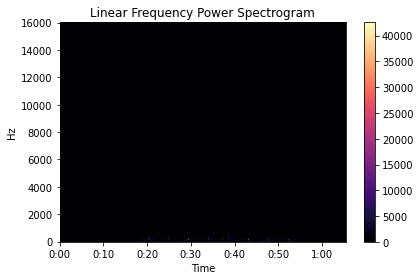

In [11]:
librosa.display.specshow(spectrogram_librosa, sr=sr, x_axis='time', y_axis='linear',hop_length=hop_length)
plt.title('Frequency Power Spectrogram (Linear)')
plt.colorbar()
plt.tight_layout()
plt.show()

**Transform the spectrogram output to a logarithmic scale by transforming the amplitude to decibels and frequency to a mel scale**

The shape of mel spectrogram is:  (64, 6552)


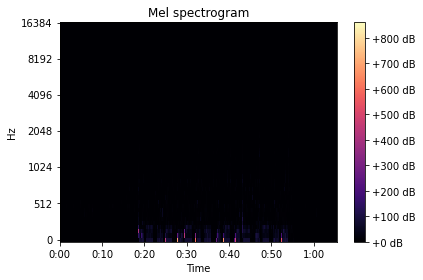

In [12]:
mel_bins = 64 # Number of mel bands
fmin = 0
fmax= None
Mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels = mel_bins, power=2.0)
print("The shape of mel spectrogram is: ", Mel_spectrogram.shape)

librosa.display.specshow(Mel_spectrogram, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

**Log Mel Spectrogram**

The shape of Log Mel spectrogram is:  (64, 6552)


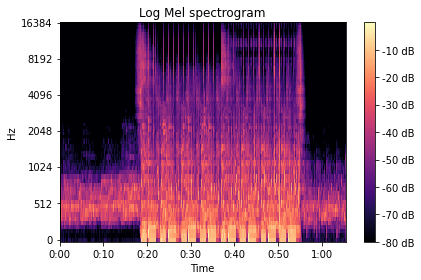

In [13]:
mel_spectrogram_db = librosa.power_to_db(Mel_spectrogram, ref=np.max)
print("The shape of Log Mel spectrogram is: ", mel_spectrogram_db.shape)
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.show()

**View the mel filter bank**

The shape of the mel filter bank is:  (64, 513)


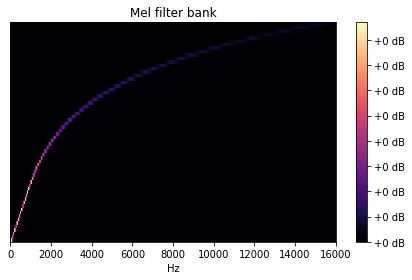

In [14]:
mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=mel_bins, fmin=0.0, fmax=None, htk=False, norm='slaney')
print("The shape of the mel filter bank is: ", mel_filter_bank.shape)
librosa.display.specshow(mel_filter_bank, sr=sr, x_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel filter bank')
plt.tight_layout()
plt.show()